# Introduction

Halo, perkenalkan saya Dinda Tirta Rahayu. Disini saya akan membahas mengenai jawaban dari setiap soal di Grade Challenge 2.

# Objectives

Pada sesi kali ini objective kita yaitu mendeteksi edge suatu gambar dan melakukan operasi perkalian matriks.

# Importing the Libraries

In [1]:
pip install Pillow

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
sy.init_printing()

from PIL import Image #Python Image Language
from scipy import misc 

# Data Loading

Calling the dataset

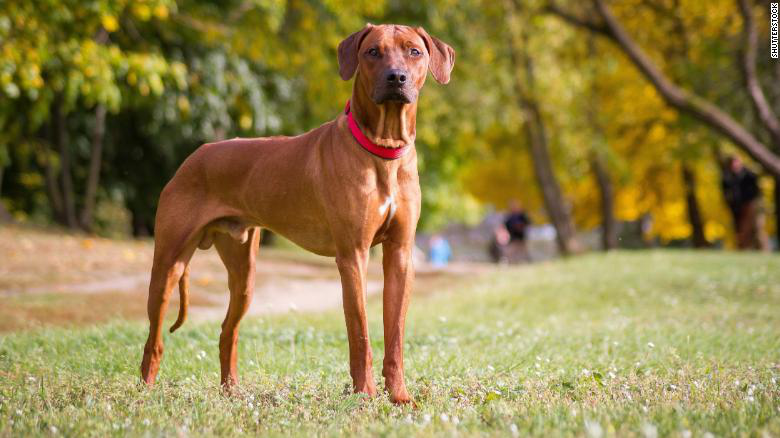

In [3]:
#call the dataset
im = Image.open('/content/trial.jpg')
im

So above we get an image that has 3 channels (red, blue, green). Let's see how the identity from this image!

In [4]:
#image identities
im = np.asarray(im)
imWidth, imHeight, channel = im.shape

print("width x height :", imWidth, "x", imHeight)
print("channels :", channel)

width x height : 438 x 780
channels : 3


# Data Preprocessing

How to create gradient vector from the pixels of image.

Pertama, mari kita lihat bagaimana kondisi array dari pixel yang ada di dalam image. Kemudian mari kita convert image dari yang punya 3 channels menjadi hanya 2 channels dengan cara mengubahnya menjadi grayscale.


In [5]:
#pixel of the image
im = np.asarray(im)
im

array([[[ 86,  93,  39],
        [ 88,  93,  39],
        [ 87,  90,  33],
        ...,
        [ 48,  41,  15],
        [ 46,  39,  10],
        [ 59,  52,  23]],

       [[ 77,  84,  30],
        [ 77,  84,  30],
        [ 78,  83,  25],
        ...,
        [ 46,  39,  13],
        [ 64,  57,  29],
        [ 37,  30,   1]],

       [[ 64,  73,  20],
        [ 66,  73,  19],
        [ 68,  73,  17],
        ...,
        [ 56,  48,  25],
        [ 44,  37,   9],
        [ 70,  60,  33]],

       ...,

       [[165, 151, 106],
        [159, 144, 101],
        [151, 134,  91],
        ...,
        [150, 139,  85],
        [149, 138,  84],
        [145, 134,  80]],

       [[164, 149, 106],
        [157, 142,  99],
        [149, 131,  91],
        ...,
        [155, 143,  93],
        [153, 141,  89],
        [148, 136,  84]],

       [[164, 149, 108],
        [157, 142, 101],
        [146, 131,  90],
        ...,
        [160, 148, 100],
        [157, 145,  97],
        [150, 138,  90]]

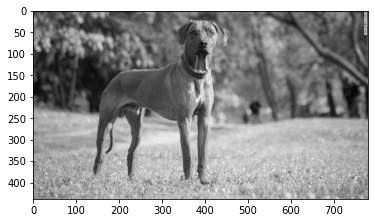

In [6]:
#convert into grayscale
R = im[:,:,0]
G = im[:,:,1]
B = im[:,:,2]
grayscale =  (0.2126*R) + (0.7152*G) + (0.0722*B) #Using Relative luminance
plt.imshow(grayscale, cmap='gray')

Disini saya menggunakan **relative luminance.** Ini bukanlah cara terbaik untuk mendapatkan pixel yang lebih tinggi dari threshold. Tetapi relative luminance ini lebih baik mengikuti cara manusia memandang cahaya. Dimana formula dari relative luminance yaitu 
**0.2126 R + 0.7152 G + 0.0722 B**

After that, kita hitung gradient vector untuk mendapatkan array yang berisi vector dari pixel di gambar yang telah kita ubah menjadi greyscale.

In [7]:
img = np.gradient(grayscale)
img

[array([[ -9.    ,  -9.4252,  -7.4974, ...,  -2.    ,  18.0722, -22.    ],
        [-10.1765, -10.2126,  -8.6765, ...,   3.7146,  -0.9639,   4.3911],
        [ -8.6765,  -9.    ,  -7.9278, ..., 107.4364, -13.9278,  19.9633],
        ...,
        [ -0.8215,  -2.1765,  -2.7854, ...,   1.8229,   1.2507,   0.7507],
        [ -0.7493,  -0.9278,  -1.6404, ...,   4.8229,   3.8229,   2.3229],
        [  0.1444,   0.1444,  -0.71  , ...,   5.1444,   4.2888,   2.2888]]),
 array([[  0.4252,  -1.1831,  -2.7192, ...,  -1.3951,   5.3917,  13.    ],
        [  0.    ,  -0.4318,  -1.0066, ...,   6.0688,  -4.6083, -27.0722],
        [  0.353 ,   0.3169,   0.6384, ...,  -2.9312,   6.0682,  23.71  ],
        ...,
        [ -6.643 ,  -8.1089,  -9.5728, ...,   1.3215,  -2.5   ,  -4.    ],
        [ -7.    ,  -8.5728,  -8.5728, ...,   0.4278,  -3.5722,  -5.    ],
        [ -7.    ,  -9.    ,  -9.0728, ...,  -0.2146,  -5.    ,  -7.    ]])]

# Image Processing

In [8]:
#process using magnitude
magnitude1 = np.sqrt((img[0]**2) + (img[1]**2))
magnitude1

array([[  9.01003857,   9.49916421,   7.97527776, ...,   2.43850446,
         18.85934362,  25.55386468],
       [ 10.1765    ,  10.22172441,   8.73469495, ...,   7.11537677,
          4.70802847,  27.4260054 ],
       [  8.68367786,   9.00557747,   7.9534626 , ..., 107.4763787 ,
         15.19232254,  30.99511973],
       ...,
       [  6.69360226,   8.39591636,   9.96980205, ...,   2.25151652,
          2.79539809,   4.06983421],
       [  7.03998938,   8.62285989,   8.72833386, ...,   4.84183614,
          5.23212932,   5.51324445],
       [  7.00148922,   9.00115833,   9.10053844, ...,   5.1488741 ,
          6.58739747,   7.36468638]])

# Why we choose the gradient magnitude?

The gradient of an image measures how it is changing. It provides two pieces of information. The magnitude of the gradient tells us how quickly the image is changing, while the direction of the gradient tells us the direction in which the image is changing most rapidly.

So, here why we calculate the pixel into magnitude function is for measuring how the image is changing. 
Using this formula : $mag=\sqrt{(\frac{\partial I}{\partial x})^2 + (\frac{\partial I}{\partial y})^2}$








So, here we try using threshold to get the best edge. 

In [9]:
def threshold(value):
  add_threshold = np.where(magnitude1 > value, 225, magnitude1)
  return add_threshold

How it's look like after all the process?

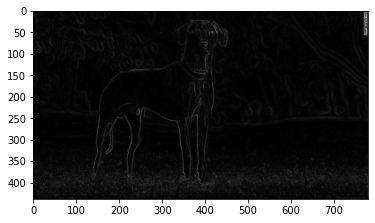

In [10]:
plt.imshow(threshold(150), cmap='gray')

# Trial 2 : Using opencv library and GraussianBlur Technique

GraussianBlur Technique ini digunakan untuk membuat blur bagian noise, mari kita lihat hasilnya.

In [11]:

import cv2
# Read the image in a grayscale mode
image = cv2.imread('trial.jpg', 0)
# Apply GaussianBlur to reduce image noise if it is required
image = cv2.GaussianBlur(image, (5, 5), 0)
image = np.gradient(image)

In [12]:
image

[array([[-4. , -3. , -4. , ..., 10. ,  5. ,  2. ],
        [-5.5, -5. , -5. , ..., 21. , 10.5,  5. ],
        [-6.5, -6.5, -5.5, ..., 37.5, 20. , 10. ],
        ...,
        [-0.5, -1. , -2. , ...,  0.5,  0.5,  0. ],
        [-0.5, -1. , -1. , ...,  2. ,  1.5,  1. ],
        [ 0. , -1. , -1. , ...,  2. ,  1. ,  1. ]]),
 array([[ -1. ,  -0.5,  -1. , ...,   1. ,   1. ,   1. ],
        [  0. ,  -0.5,  -0.5, ...,  -2.5,  -3. ,  -2. ],
        [  0. ,   0. ,   0. , ..., -15. , -15. , -10. ],
        ...,
        [ -3. ,  -5. ,  -6. , ...,  -0.5,  -0.5,   0. ],
        [ -3. ,  -5. ,  -6. , ...,  -1. ,  -1. ,  -1. ],
        [ -4. ,  -5.5,  -6. , ...,  -1. ,  -1.5,  -1. ]])]

In [13]:
magnitude2 = np.sqrt((image[0]**2) + (image[1]**2))

In [14]:
def threshold2(value):
  add_threshold2 = np.where(magnitude2 > value, 255, magnitude2)
  return add_threshold2

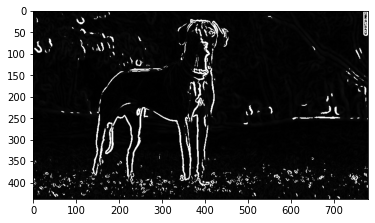

In [15]:
plt.imshow(threshold2(15), cmap='gray')

# Trial 3: Using a flat formula of grayscale

This will require converting RGB to luminance using either a flat 33.3% factor.
A flat conversion can be beneficial performance wise but provides less accurate result. Let's check it:

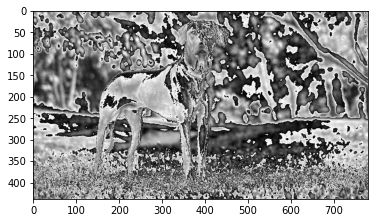

In [16]:
gambar = Image.open('/content/trial.jpg')
gambar = np.asarray(gambar)


R = im[:,:,0]
G = im[:,:,1]
B = im[:,:,2]
grayscale =  (R + G + B)/0.3333 #flat formula
plt.imshow(grayscale, cmap='gray')


gambar_ = np.gradient(grayscale)
magnitude3 = np.sqrt((gambar_[0]**2) + (gambar_[1]**2))

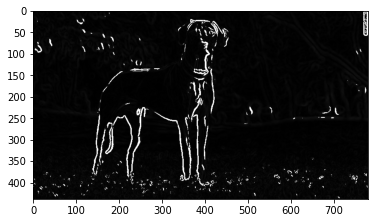

In [17]:
#result image
def threshold3(value):
  add_threshold3 = np.where(magnitude2 > value, 255, magnitude2)
  return add_threshold3
plt.imshow(threshold3(18), cmap='gray')

# Hasil dan Kesimpulan

Berdasarkan hasil diatas, diketahui bahwa :
1.   **Trial 1 menggunakan relative luminance** didapatkan bahwa edge image yang dihasilkan sudah membentuk objek namun sangat banyak noise nya. Saya memilih untuk ambil di threshold 150 untuk ketajaman edge nya.

2.   **Trial 2 menggunakan Graussian Blur** didapatkan bahwa edge image nya sudah membentuk objek dengan baik dibandingkan trial 1, disini yang lebih jelas edge nya pada bagian anjing, edge nya cukup tajam dan noise gambar berkurang, syaa ambil threshold 15.

3.   **Trial 3 menggunakan flat formula 33,3%** didapatkan bahwa edge terlihat tajam dan noise gambar lebih berkurang dibanding trial 2. 

Dapat disimpulkan bahwa **Trial 3 adalah teknik terbaik** untuk mengambil fokus dari edge suatu gambar terutama fokus pada gambar anjingnya. Dalam proses ini, magnitude berfungsi untuk membentuk edge nya. Kemudian threshold membantu untuk memfokuskan edge nya, **semakin besar threshold semakin fokus edge pada suatu objek atau semakin menghilangnya noise image.**




In [18]:
#identity of image are width x height : 438 x 780
array1 = np.random.rand(438,780)
array2 = np.random.rand(780,438)
multiply = np.dot(array1,array2)
multiply

array([[204.18987821, 200.87797393, 195.47325013, ..., 196.62784072,
        196.31889424, 192.33117658],
       [193.635314  , 191.5445934 , 194.69330135, ..., 196.03643926,
        188.42484252, 182.79811952],
       [194.39452999, 191.66771481, 191.44170346, ..., 191.64425407,
        185.91050982, 185.35397082],
       ...,
       [200.12375167, 197.93780077, 194.10186301, ..., 192.3423725 ,
        190.0804256 , 186.52360539],
       [206.32133175, 197.99275088, 196.14457112, ..., 190.7896055 ,
        193.55457683, 191.15530687],
       [190.62084283, 189.49890754, 188.5964488 , ..., 189.50365578,
        183.69823457, 184.07278831]])

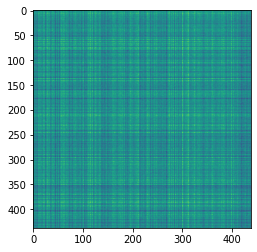

In [19]:
plt.imshow(multiply)